In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [11]:
# Define the Bitcoin symbol
btc_symbol = "BTC-USD"

# Fetch the Bitcoin data with maximum period available
btc_data = yf.Ticker(btc_symbol)
hist_data = btc_data.history(period="max")

# Display the first few rows of the DataFrame
print(hist_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0  


In [12]:
# Save the data to a CSV file (optional)
hist_data.to_csv('bitcoin_data.csv')

In [13]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3564 entries, 2014-09-17 00:00:00+00:00 to 2024-06-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3564 non-null   float64
 1   High          3564 non-null   float64
 2   Low           3564 non-null   float64
 3   Close         3564 non-null   float64
 4   Volume        3564 non-null   int64  
 5   Dividends     3564 non-null   float64
 6   Stock Splits  3564 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 222.8 KB


In [14]:
hist_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3564.000000,3564.000000,3564.000000,3564.000000,3.564000e+03,3564.0,3564.0
mean,16719.369700,17103.498577,16309.544846,16736.262887,1.729409e+10,0.0,0.0
std,18609.105361,19035.660108,18141.085974,18622.484166,1.920389e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,1045.704956,1064.245026,1027.457489,1046.915009,2.431103e+08,0.0,0.0
50%,8812.485352,9007.750977,8640.885742,8818.092285,1.324503e+10,0.0,0.0
75%,27509.907227,28057.763184,27069.617676,27544.008301,2.792719e+10,0.0,0.0
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11,0.0,0.0


In [15]:
hist_data.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [16]:
hist_data

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476


In [17]:
# Convert the index to datetime
hist_data.index = pd.to_datetime(hist_data.index)

# Extract only the date part
hist_data.index = hist_data.index.date

# Display the DataFrame
hist_data

,Open,High,Low,Close,Volume
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,14121265576
2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,13281140541
2024-06-17,66636.515625,67188.320312,65094.964844,66490.296875,30006354476
2024-06-18,66490.976562,66556.703125,64066.957031,65140.746094,39481285950


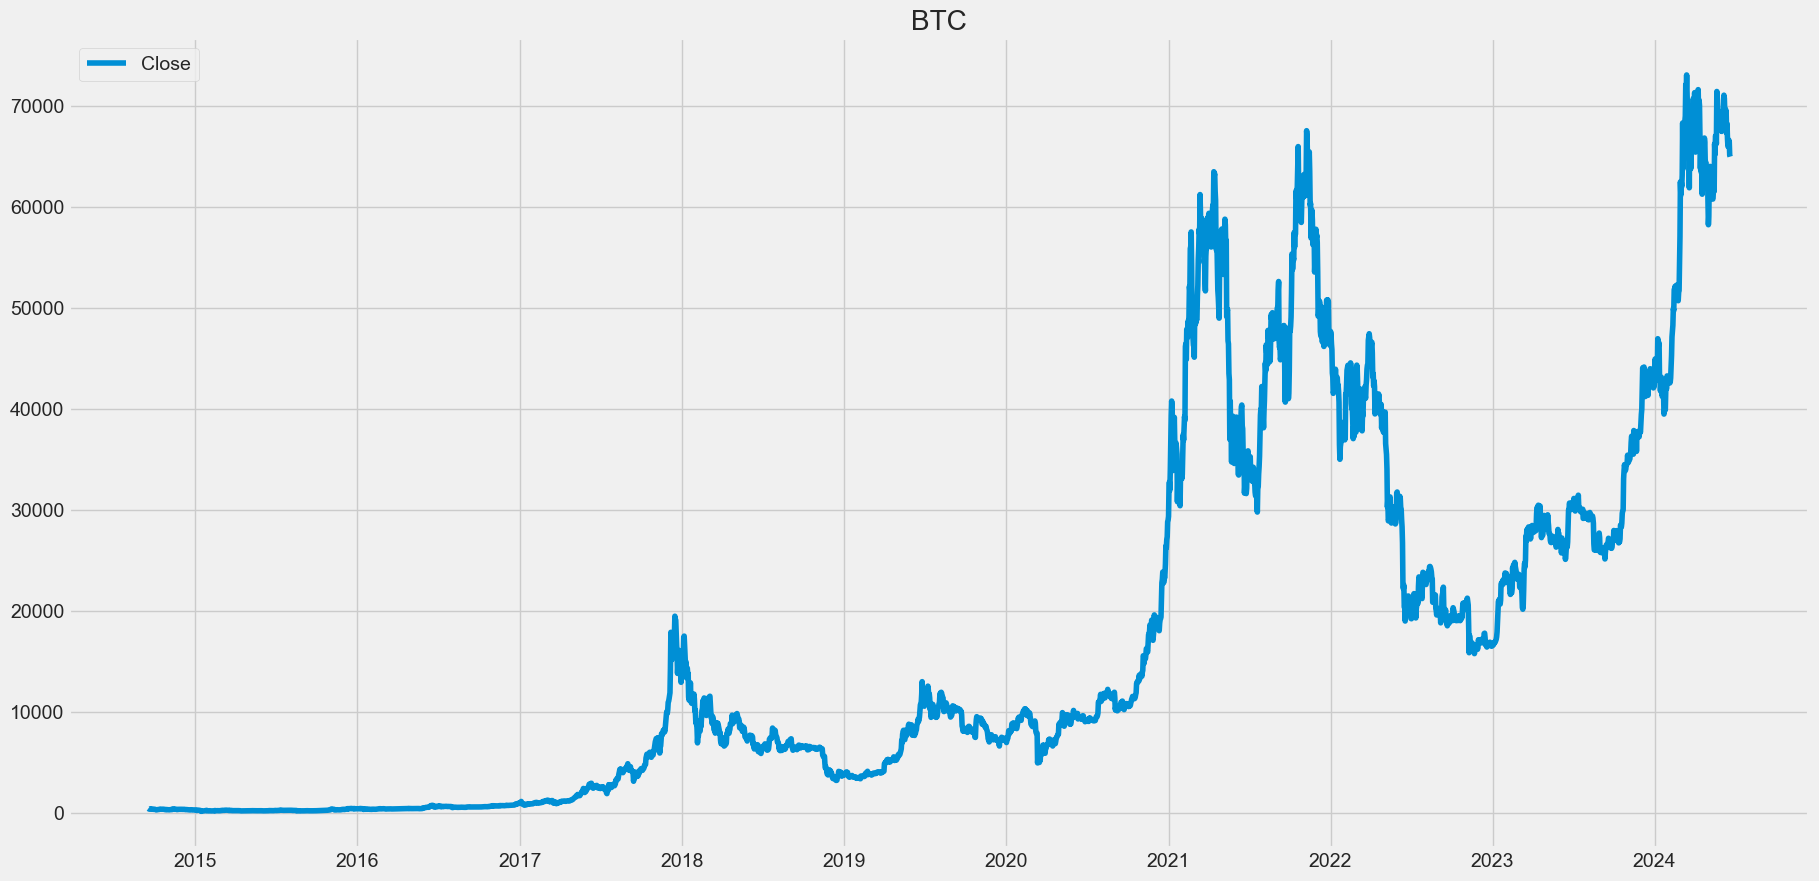

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed
hist_data[['Close']].plot(ax=ax)
ax.set_title('BTC')
plt.show()

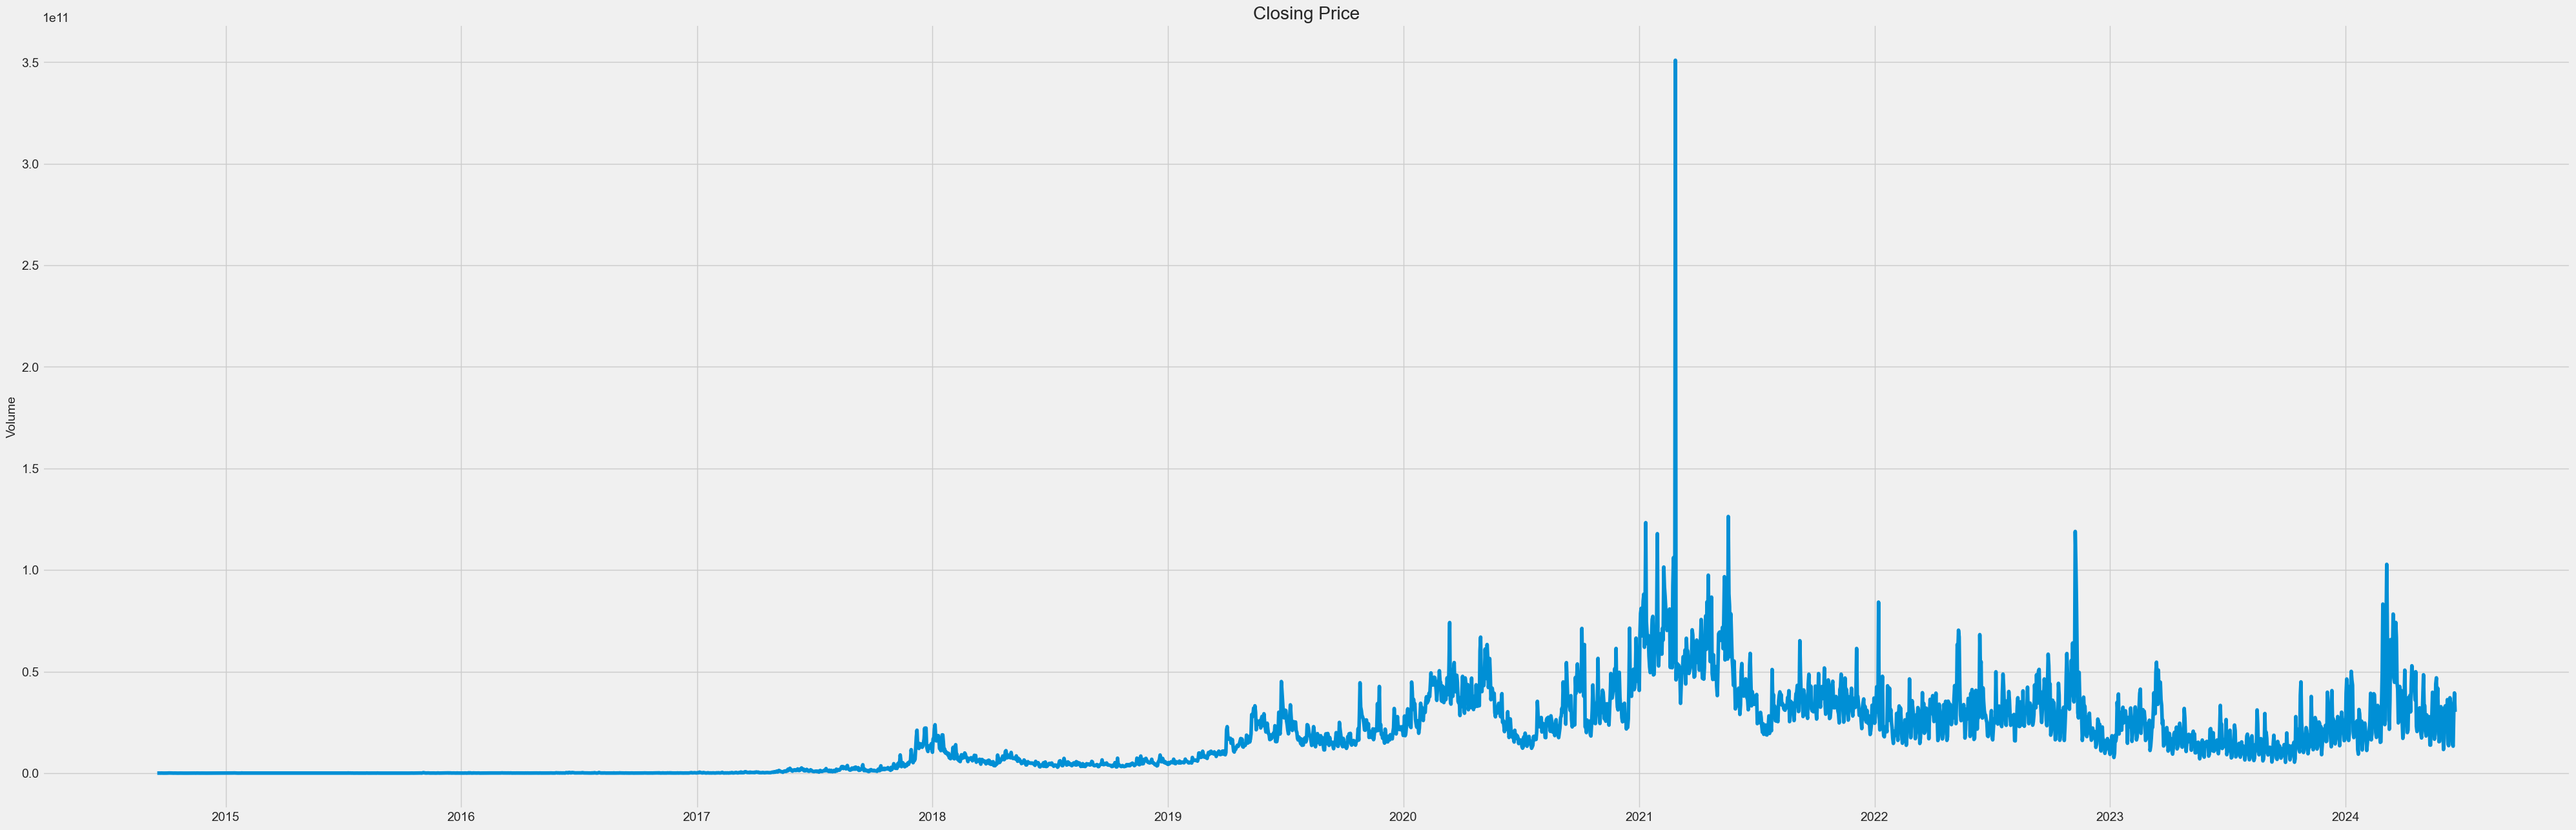

In [19]:
plt.figure(figsize=(45,15))
hist_data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Closing Price")
plt.show()

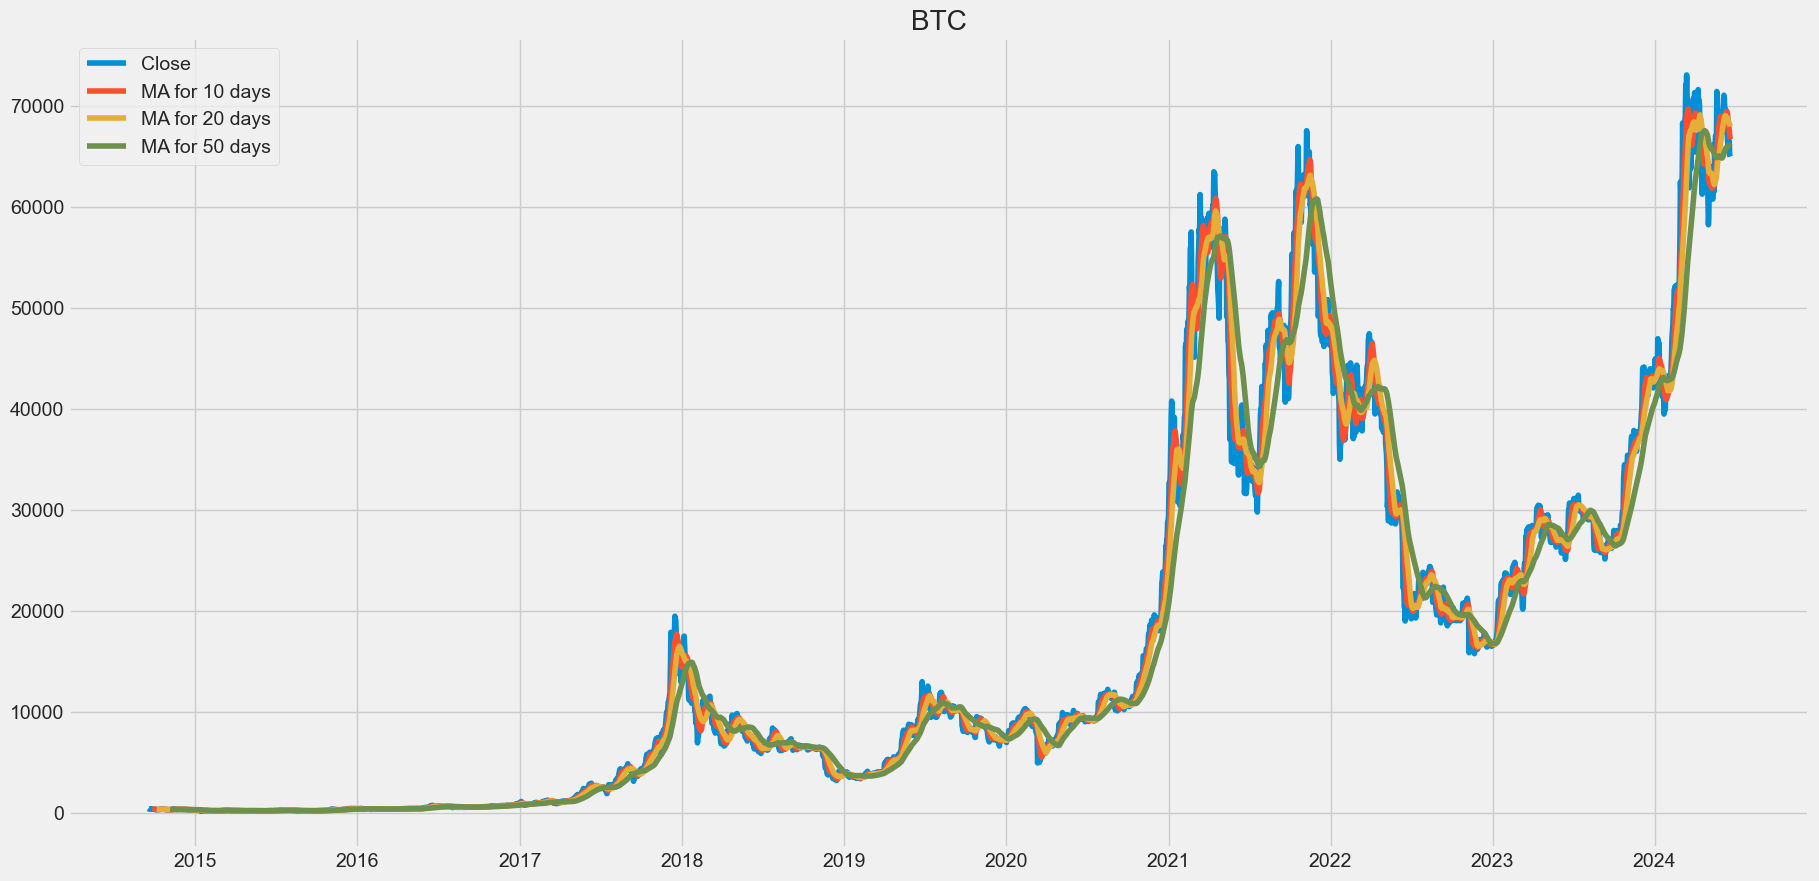

In [20]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    hist_data[column_name] = hist_data['Close'].rolling(ma).mean()
    
# Create a larger figure and plot
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed
hist_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
ax.set_title('BTC')
plt.show()

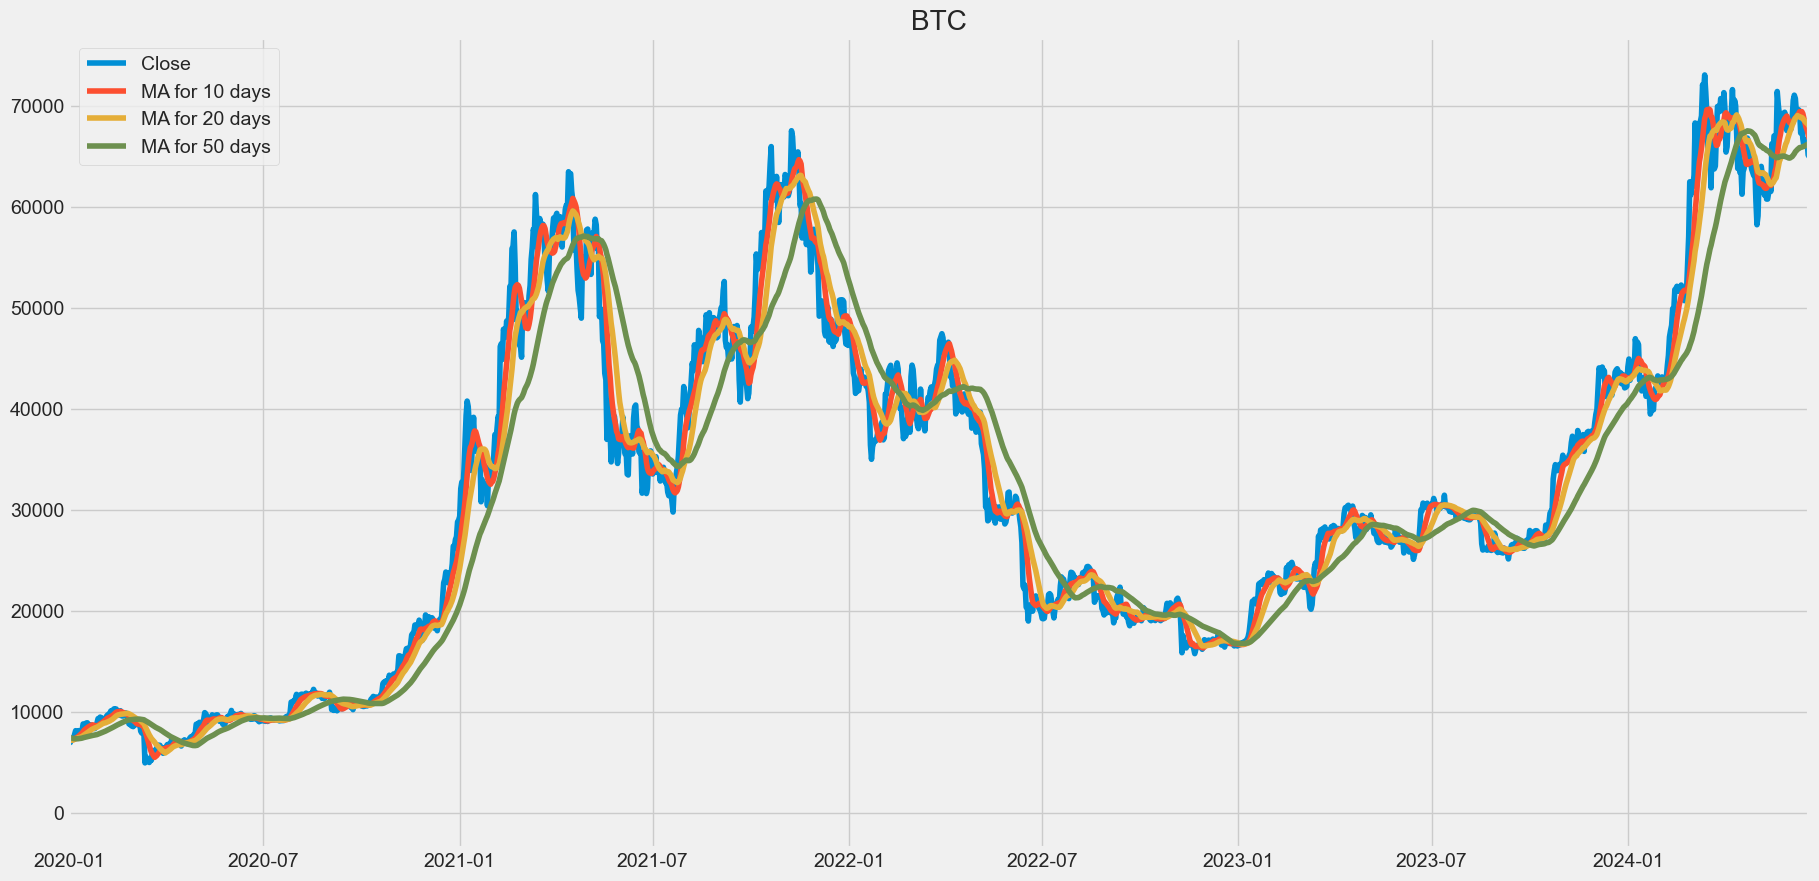

In [21]:
# Create a larger figure and plot
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed

# Plot the data
hist_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)

# Set the x-axis limit to start from 2020
ax.set_xlim(pd.Timestamp('2020-01-01'), hist_data.index.max())

# Set the title
ax.set_title('BTC')

# Show the plot
plt.show()

In [22]:
hist_data['Daily Return'] = hist_data['Close'].pct_change()

In [23]:
hist_data

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,NaN,NaN,NaN,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,NaN,NaN,NaN,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,NaN,NaN,NaN,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,NaN,NaN,NaN,-0.024659
...,...,...,...,...,...,...,...,...,...
2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,68309.750781,68506.834375,66065.551953,0.002725
2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,67897.939062,68369.058984,66129.950078,0.006769
2024-06-17,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,67612.710156,68278.762891,66197.491406,-0.002232
2024-06-18,66490.976562,66556.703125,64066.957031,65140.746094,39481285950,67196.207422,68156.895508,66223.483906,-0.020297


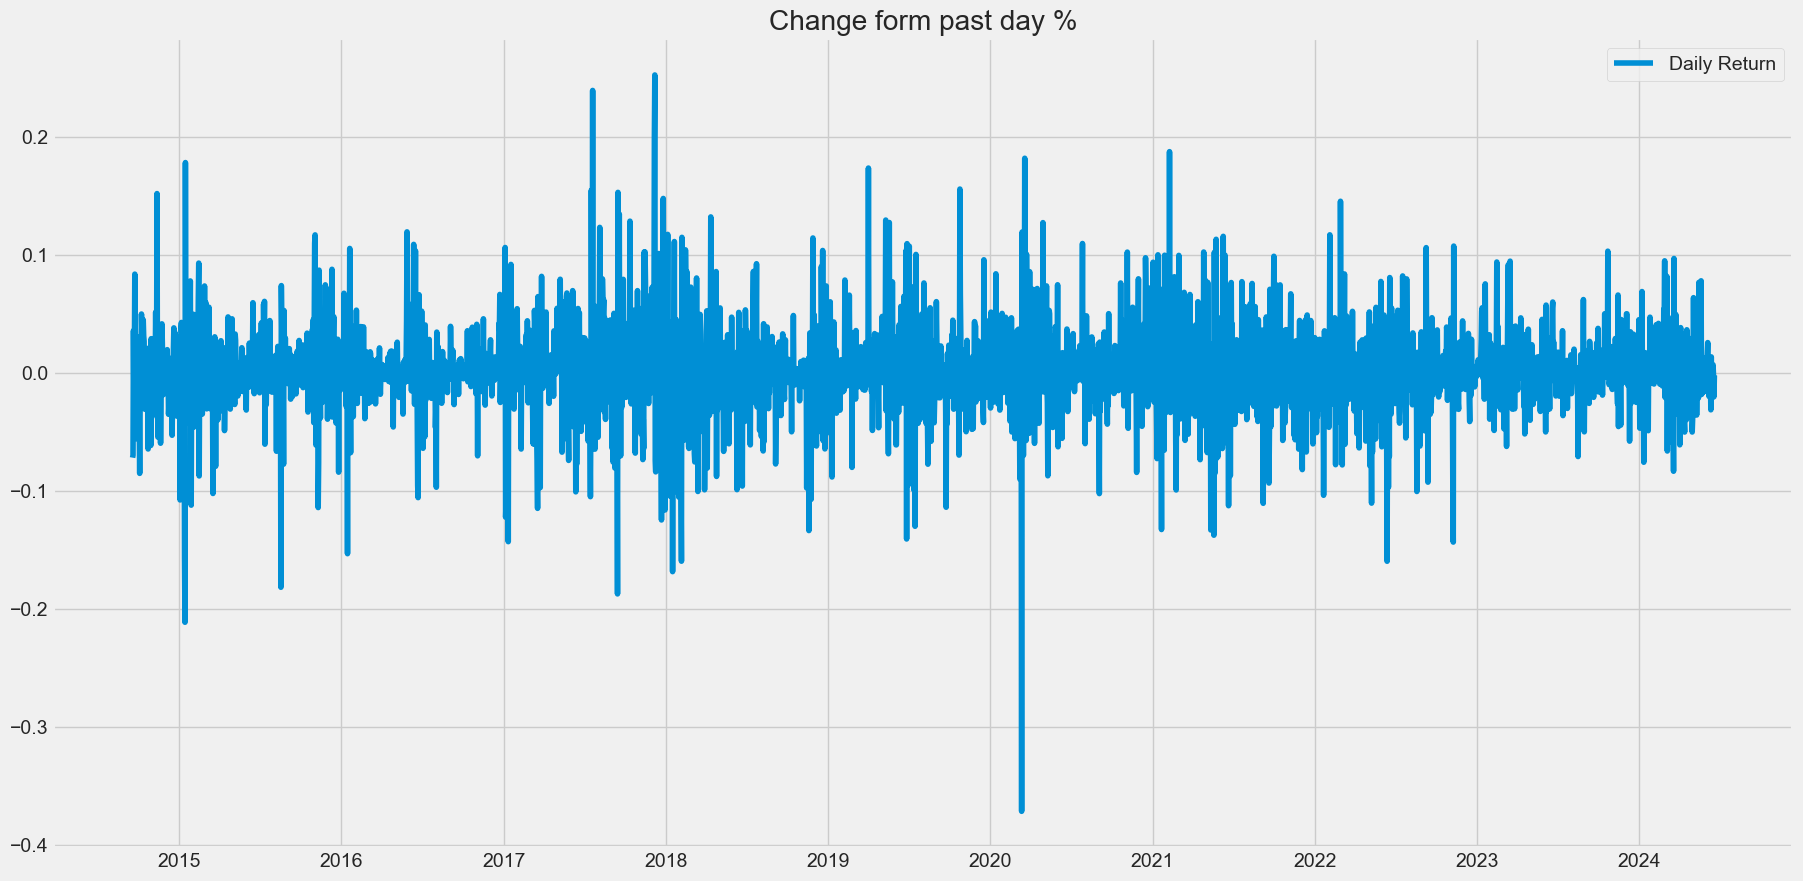

In [24]:
# Create a larger figure and plot
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust figsize as needed
hist_data[['Daily Return']].plot(ax=ax)
ax.set_title('Change form past day %')
plt.show()

Text(0.5, 1.0, 'Change compared to the previous day %')

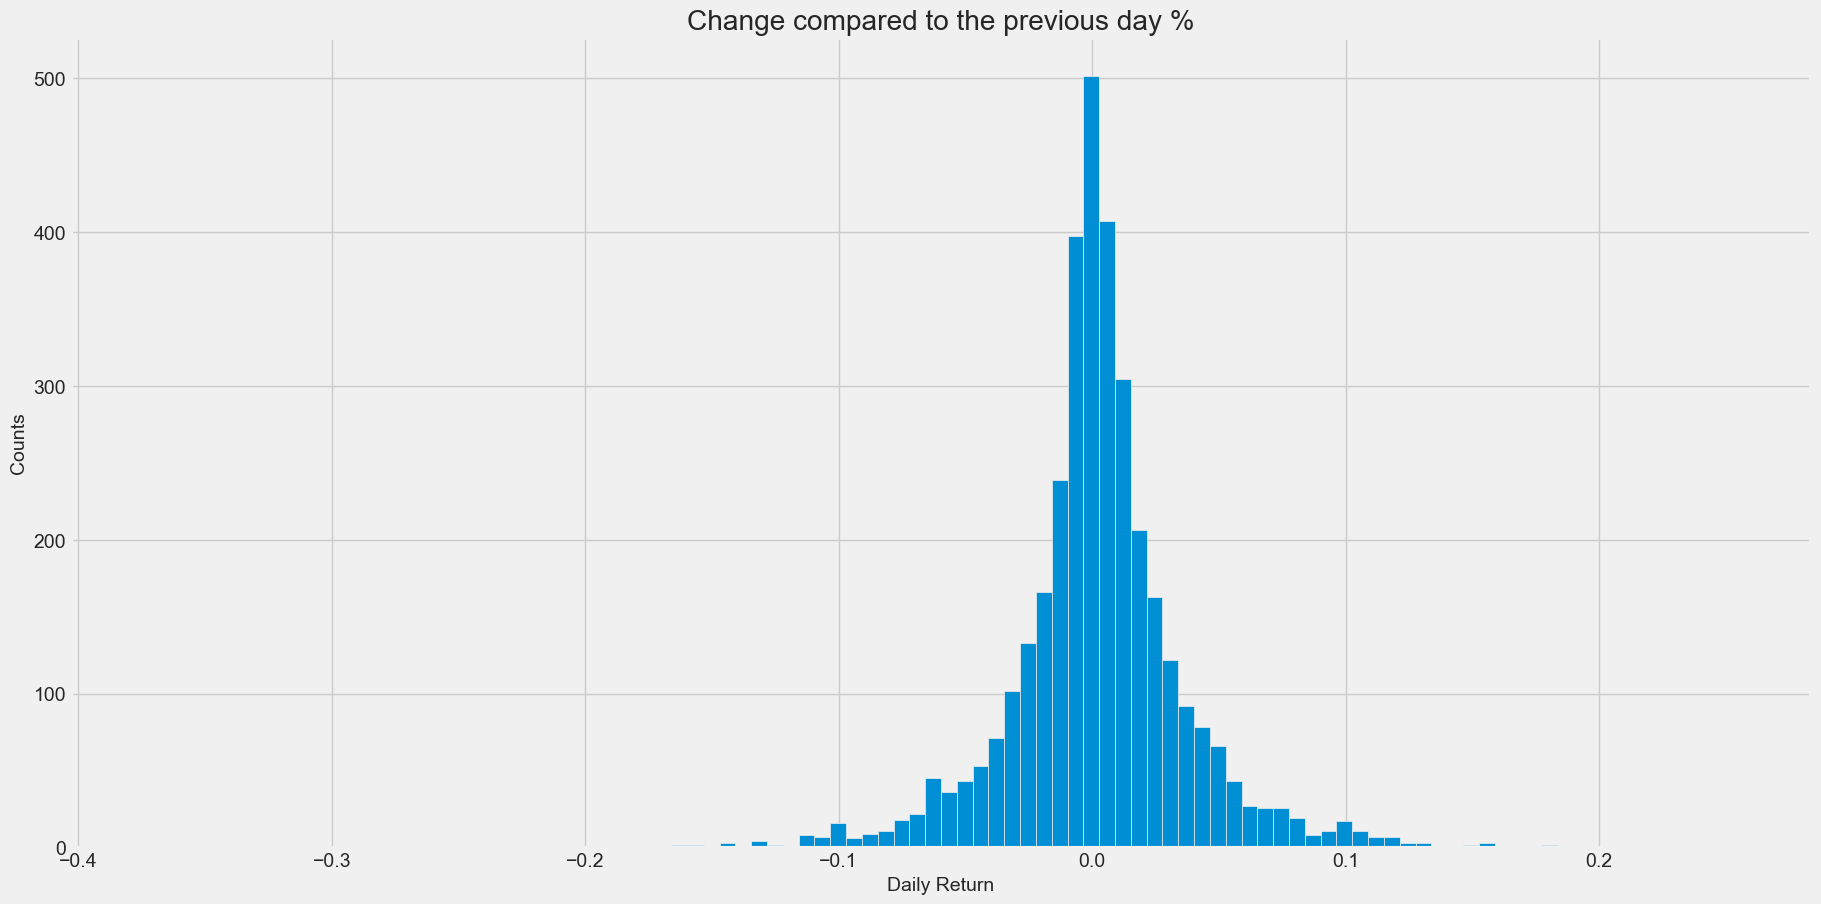

In [25]:
plt.figure(figsize=(20, 10))
hist_data['Daily Return'].hist(bins=100)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Change compared to the previous day %')

In [26]:
# Create a new dataframe with only the 'Close column 
data = hist_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3386

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.90956495],
       [0.89105397],
       [0.8890361 ]])

In [28]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape) 

[array([0.00383005, 0.00337886, 0.00297225, 0.00316576, 0.00302746,
       0.00307315, 0.00353455, 0.00336192, 0.00320238, 0.00310432,
       0.00303705, 0.00273063, 0.00270712, 0.00286455, 0.00281889,
       0.00270171, 0.00248828, 0.00206793, 0.00195331, 0.00208456,
       0.00216834, 0.00239814, 0.00256391, 0.0025164 , 0.00252651,
       0.0027494 , 0.00291214, 0.00305556, 0.00297193, 0.00280436,
       0.00282085, 0.00292624, 0.00290024, 0.00280832, 0.00285812,
       0.00281262, 0.00247326, 0.00247227, 0.00232038, 0.00242233,
       0.00239881, 0.0024623 , 0.00216017, 0.00229341, 0.00219762,
       0.00202517, 0.00202713, 0.00204993, 0.00209023, 0.00221359,
       0.00234807, 0.00225377, 0.00229592, 0.00253974, 0.00258995,
       0.00260052, 0.0033668 , 0.00332804, 0.0030137 , 0.00271626])]
[0.0028774137488077373]

[array([0.00383005, 0.00337886, 0.00297225, 0.00316576, 0.00302746,
       0.00307315, 0.00353455, 0.00336192, 0.00320238, 0.00310432,
       0.00303705, 0.00273063, 0.

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)


Epoch 1/2

3326/3326 [==============================] - 58s 16ms/step - loss: 0.0012
Epoch 2/2
3326/3326 [==============================] - 56s 17ms/step - loss: 4.4916e-04


In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 16ms/step


2137.333372285111

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9606672723751514

C:\Users\max\AppData\Local\Temp\ipykernel_225632\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


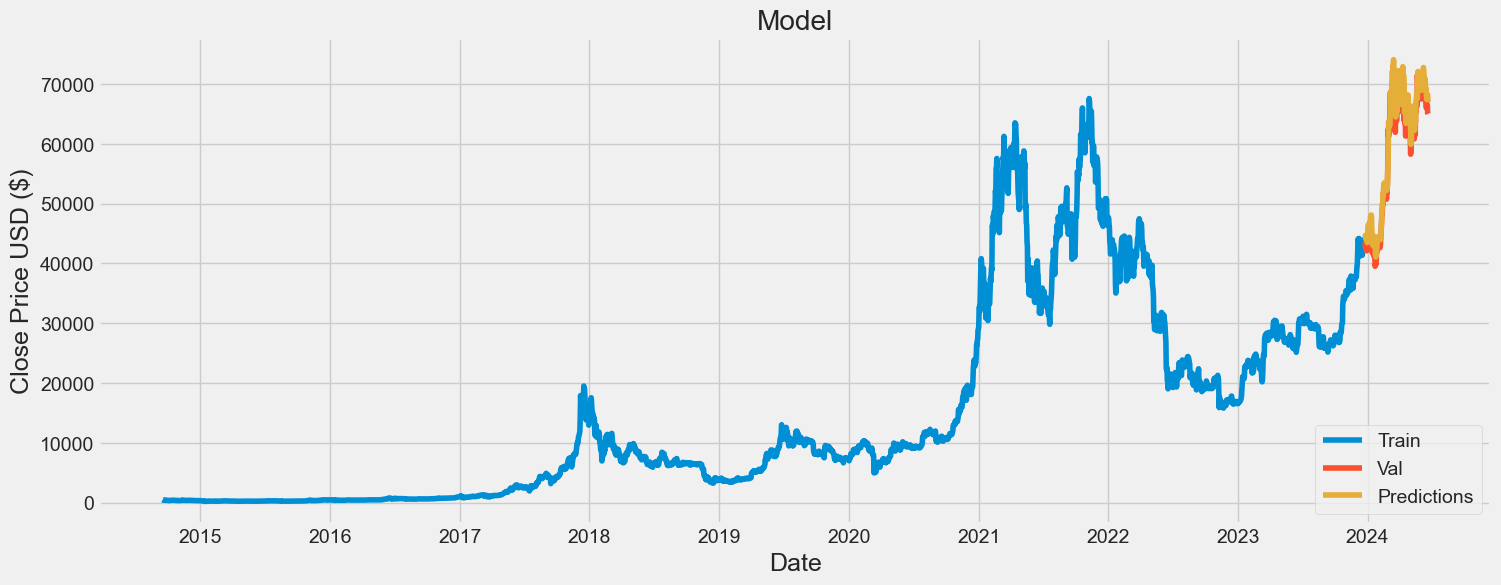

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

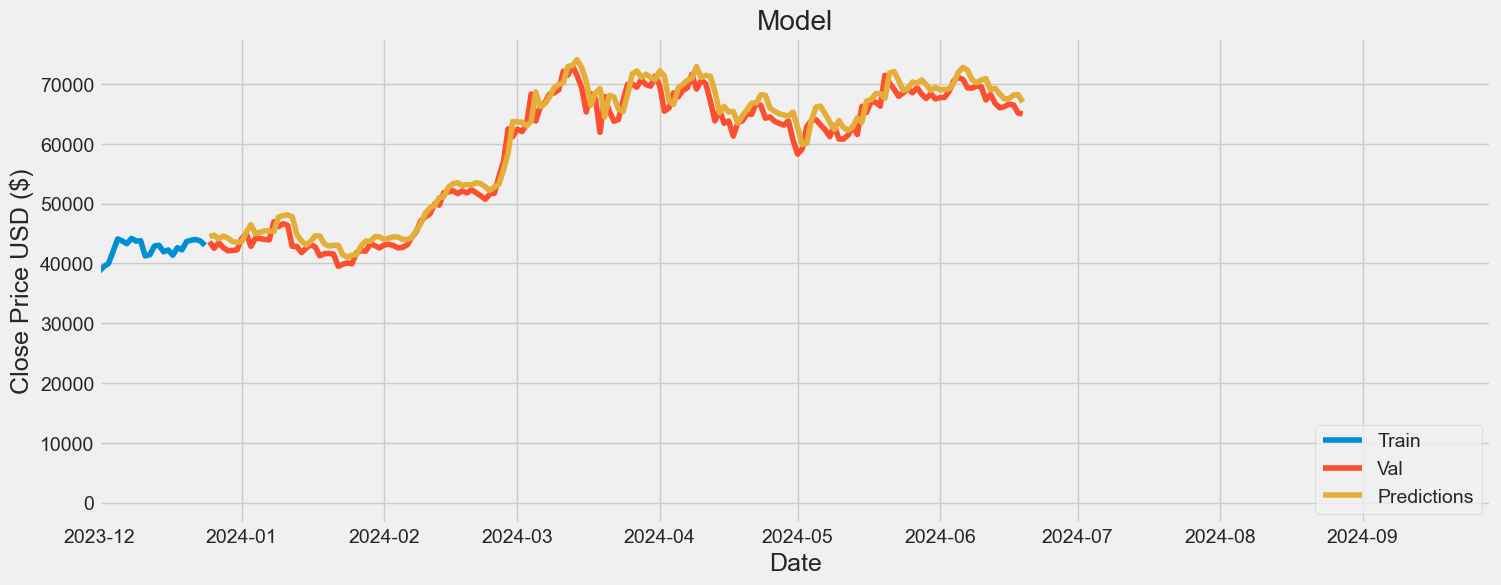

In [36]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Set X-axis limit to dates after 2023
plt.xlim(pd.Timestamp('2023-12-01'), pd.Timestamp('2024-9-29'))
plt.show()

In [39]:
model.save('LSTM_WITH_TEST.h5')

C:\Users\max\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


This notebook is incomplete